In [36]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import time

In [37]:
"Função para plotar o potencial -> x,y,V"

def plot2D(x, y, V):
    fig = plt.figure(figsize=(10, 10), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, V[:], rstride=1, cstride=1, cmap=cm.magma,
            linewidth=1, antialiased=False)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$V$')
    plt.show();

In [38]:
"Plota as equipotenciais"
def plot_equip(x,y,V):
    fig = plt.contourf(x,y,V,20,cmap='magma')
    plt.rcParams['figure.figsize'] = (8,8)
    plt.colorbar()
    plt.title('Linhas equipotenciais do Potencial Elétrico')
    plt.xlabel("x")
    plt.ylabel("y")
    #plt.axes().set_aspect('equal')

In [39]:
"Calcula a equação de Laplace"
def laplace2d(V,nx,ny,l1norm_target):
    l1norm = 1
    contador = 0
    Vn = np.empty_like(V)
    omega = 2/(1 + (np.pi)/nx)
    #omega = 1.5
    while l1norm > l1norm_target:
        Vn = V.copy()
        avg = np.roll(Vn,1,axis=0)+np.roll(Vn,-1,axis=0)+np.roll(Vn,1,axis=1)+np.roll(Vn,-1,axis=1)         
        V = avg/4

                
        #Condições de Contorno
        V[:, 0] = 0  # V = 0 @ x = -1
        V[:, nx-1] = 0  # V = 0 @ x = 1
        V[0,:] = 0  # V = 0 @ y = -1
        V[ny-1,:] = 0  # V = 0 @ y = 1
        V[int(round(((nx-1)/2)*(3/5))):int(round(((nx-1)/2)*(7/5)+1)),int(round(((ny-1)/2)*(3/5)))]=1 #Placa em x = -0.4
        V[int(round(((nx-1)/2)*(3/5))):int(round(((nx-1)/2)*(7/5)+1)),int(round(((ny-1)/2)*(7/5)))]=-1 #Placa em x = 0.4
        
        #Calculando a norma
        l1norm = np.sqrt(np.sum((V - Vn)**2)/np.sum(Vn**2))
        
        contador += 1 
    

    print("Iterações=",contador)
    return V

In [40]:
"Definindo a rede"
nx = 11
ny = 11
x = np.linspace(-1, 1, nx)
y = np.linspace(-1, 1, ny)

In [41]:
"Condições de contorno"
V = np.zeros((ny, nx))  # create a XxY vector of 0's
V[:, 0] = 0  # V = 0 @ x = -1
V[:, nx-1] = 0  # V = 0 @ x = 1
V[0,:] = 0  # V = 0 @ y = -1
V[ny-1,:] = 0  # V = 0 @ y = 1
V[int(round(((nx-1)/2)*(3/5))):int(round(((nx-1)/2)*(7/5)+1)),int(round(((ny-1)/2)*(3/5)))]=1 #Placa em x = -0.4
V[int(round(((nx-1)/2)*(3/5))):int(round(((nx-1)/2)*(7/5)+1)),int(round(((ny-1)/2)*(7/5)))]=-1 #Placa em x = 0.4

In [42]:
"Inicia o relógio"
t0 = time.process_time()

In [43]:
V=laplace2d(V,nx,ny,1e-8)

Iterações= 59


In [44]:
"Termina o relógio e conta"
t1 = time.process_time()
dt = t1 - t0
print('Tempo =', dt)

Tempo = 0.04133099999999956


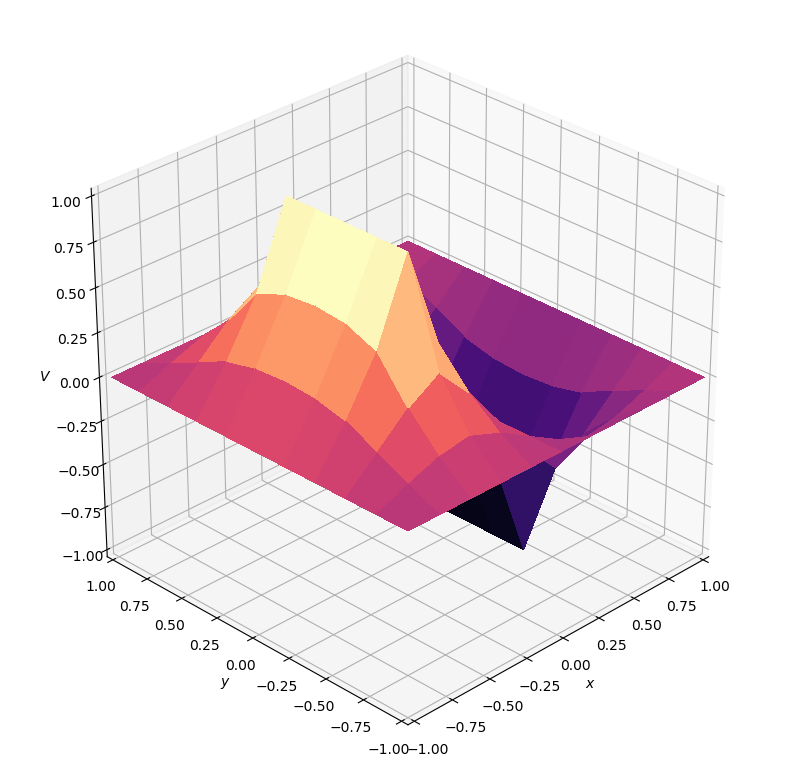

In [45]:
plot2D(x, y, V)

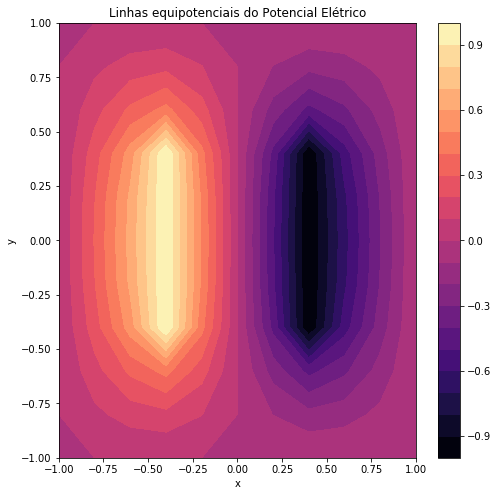

In [46]:
plot_equip(x,y,V)

In [47]:
data = np.loadtxt('ex7_Jacobi_capacitor.txt')
L = data[:,0]
Iteraçoes = data[:,1]
data2 = np.loadtxt('ex7_overrelax_capacitor.txt')
L2 = data2[:,0]
Iteraçoes2 = data2[:,1]

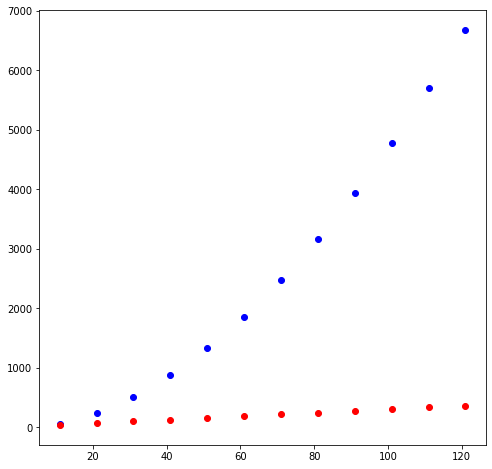

In [48]:
plt.plot(L, Iteraçoes, 'bo')
plt.plot(L2, Iteraçoes2, 'ro')

In [49]:
def parabola(L,amp):
    return amp*(L**2)

In [50]:
def reta(L,amp):
    return amp*(L)

In [51]:
from scipy.optimize import curve_fit
import math

In [52]:
pars, cov = curve_fit(f=parabola, xdata=L, ydata=Iteraçoes, p0=1, bounds=(-np.inf, np.inf))

In [53]:
'Calculando R^2'
res = Iteraçoes - parabola(L, *pars)
ss_res = np.sum(res**2)
ss_tot = np.sum((Iteraçoes-np.mean(Iteraçoes))**2)
r_squared = 1 - (ss_res / ss_tot)
print('R^2 =', r_squared)

R^2 = 0.9982612565579194


In [54]:
pars2, cov2 = curve_fit(f=reta, xdata=L2, ydata=Iteraçoes2, p0=1, bounds=(-np.inf, np.inf))

In [55]:
'Calculando R^2'
res2 = Iteraçoes2 - reta(L2, *pars2)
ss_res2 = np.sum(res2**2)
ss_tot2 = np.sum((Iteraçoes2-np.mean(Iteraçoes2))**2)
r_squared2 = 1 - (ss_res2 / ss_tot2)
print('R^2 =', r_squared2)

R^2 = 0.9993895524038099


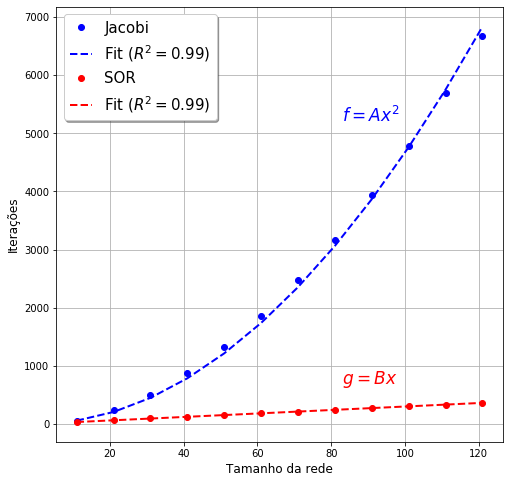

In [82]:
plt.plot(L, Iteraçoes, 'bo')
plt.plot(L, parabola(L, *pars), linestyle='--', linewidth=2, color='blue')
plt.plot(L2, Iteraçoes2, 'ro')
plt.plot(L2, reta(L2, *pars2), linestyle='--', linewidth=2, color='red')
plt.legend(("Jacobi", "Fit ($R^2=0.99$)", "SOR", "Fit ($R^2=0.99$)"), shadow=True, handlelength=1.5, fontsize=15)
plt.grid()
plt.text(83, 5200, '$f = Ax^2$', {'color': 'blue', 'fontsize': 17})
plt.text(83, 700, '$g = Bx$', {'color': 'red', 'fontsize': 17})
plt.xlabel("Tamanho da rede", fontsize=12)
plt.ylabel("Iterações", fontsize=12)
plt.savefig('SOR')